<a href="https://colab.research.google.com/github/supraja777/CreditCardUsageAnalysisML/blob/main/Credit_Card_Usage_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', 100)  # Set display width

In [2]:
credit_card_df = pd.read_csv('Marketing_data.csv')

In [5]:
print(credit_card_df)

     CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00                   95.40   
1     C10002  3202.467416           0.909091       0.00              0.00                    0.00   
2     C10003  2495.148862           1.000000     773.17            773.17                    0.00   
3     C10004  1666.670542           0.636364    1499.00           1499.00                    0.00   
4     C10005   817.714335           1.000000      16.00             16.00                    0.00   
...      ...          ...                ...        ...               ...                     ...   
8945  C19186    28.493517           1.000000     291.12              0.00                  291.12   
8946  C19187    19.183215           1.000000     300.00              0.00                  300.00   
8947  C19188    23.398673           0.833333     144.40              0.00                  

In [6]:
credit_card_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [8]:
credit_card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [9]:
credit_card_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


<Axes: >

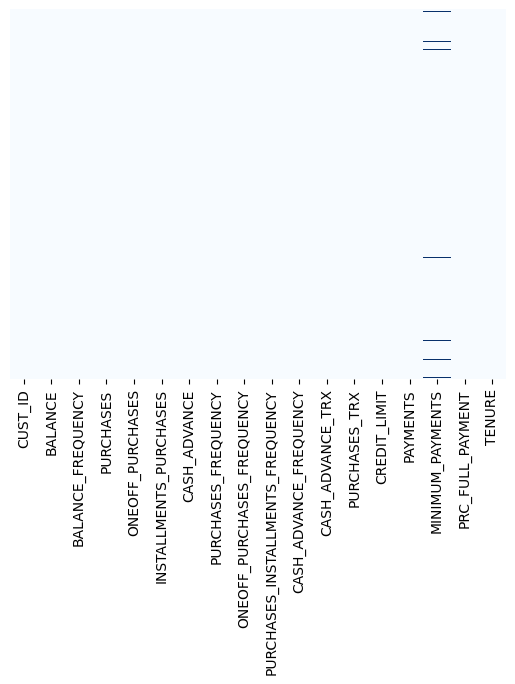

In [14]:
#checking for null values
sns.heatmap(credit_card_df.isnull(), yticklabels = False, cbar = False, cmap = "Blues" )

In [15]:
credit_card_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [17]:
#filling up missing data with mean
credit_card_df.loc[(credit_card_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = credit_card_df['MINIMUM_PAYMENTS'].mean()
credit_card_df['MINIMUM_PAYMENTS']

0        139.509787
1       1072.340217
2        627.284787
3        864.206542
4        244.791237
           ...     
8945      48.886365
8946     864.206542
8947      82.418369
8948      55.755628
8949      88.288956
Name: MINIMUM_PAYMENTS, Length: 8950, dtype: float64

In [18]:
credit_card_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [19]:
credit_card_df.loc[(credit_card_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = credit_card_df['CREDIT_LIMIT'].mean()

In [20]:
credit_card_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [21]:
#checking if we have duplicate values
credit_card_df.duplicated().sum()

0

In [ ]:
#dropping credit card id
credit_card_df.drop('CUST_ID', axis = 1, inplace = True)

In [24]:
credit_card_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


<ipython-input-30-50403e14af2d>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(credit_card_df[credit_card_df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
<ipython-input-30-50403e14af2d>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(credit_card_df[cr

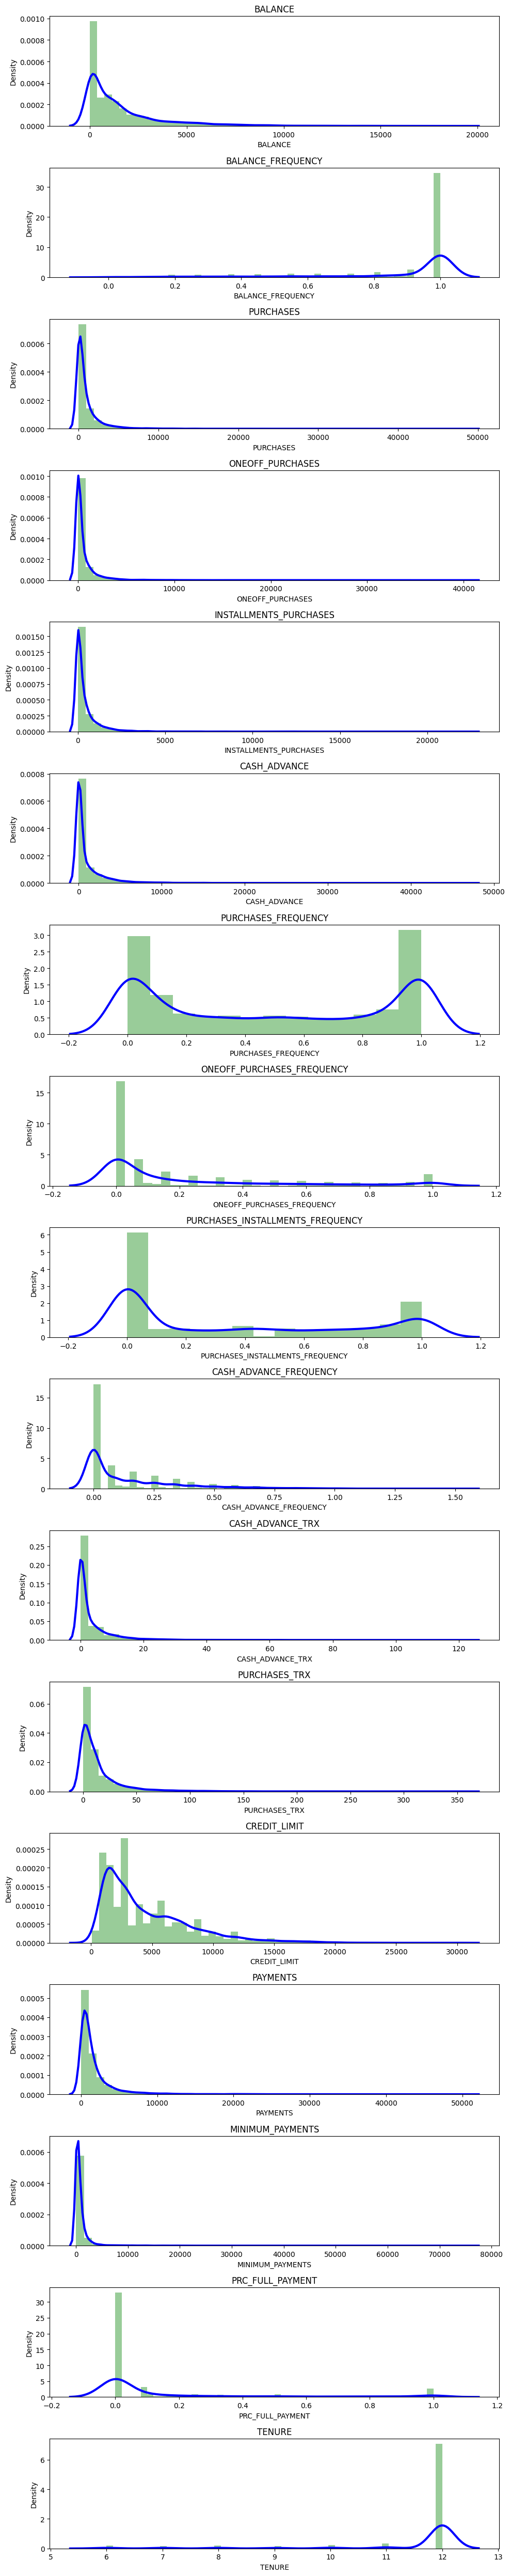

In [30]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable.
# KDE demonstrates the probability density at different values in a continuous variable.

plt.figure(figsize = (10,50))
for i in range(len(credit_card_df.columns)):
  plt.subplot(17,1,i+1)
  sns.distplot(credit_card_df[credit_card_df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(credit_card_df.columns[i])

plt.tight_layout()

In [31]:
correlations = credit_card_df.corr()

<Axes: >

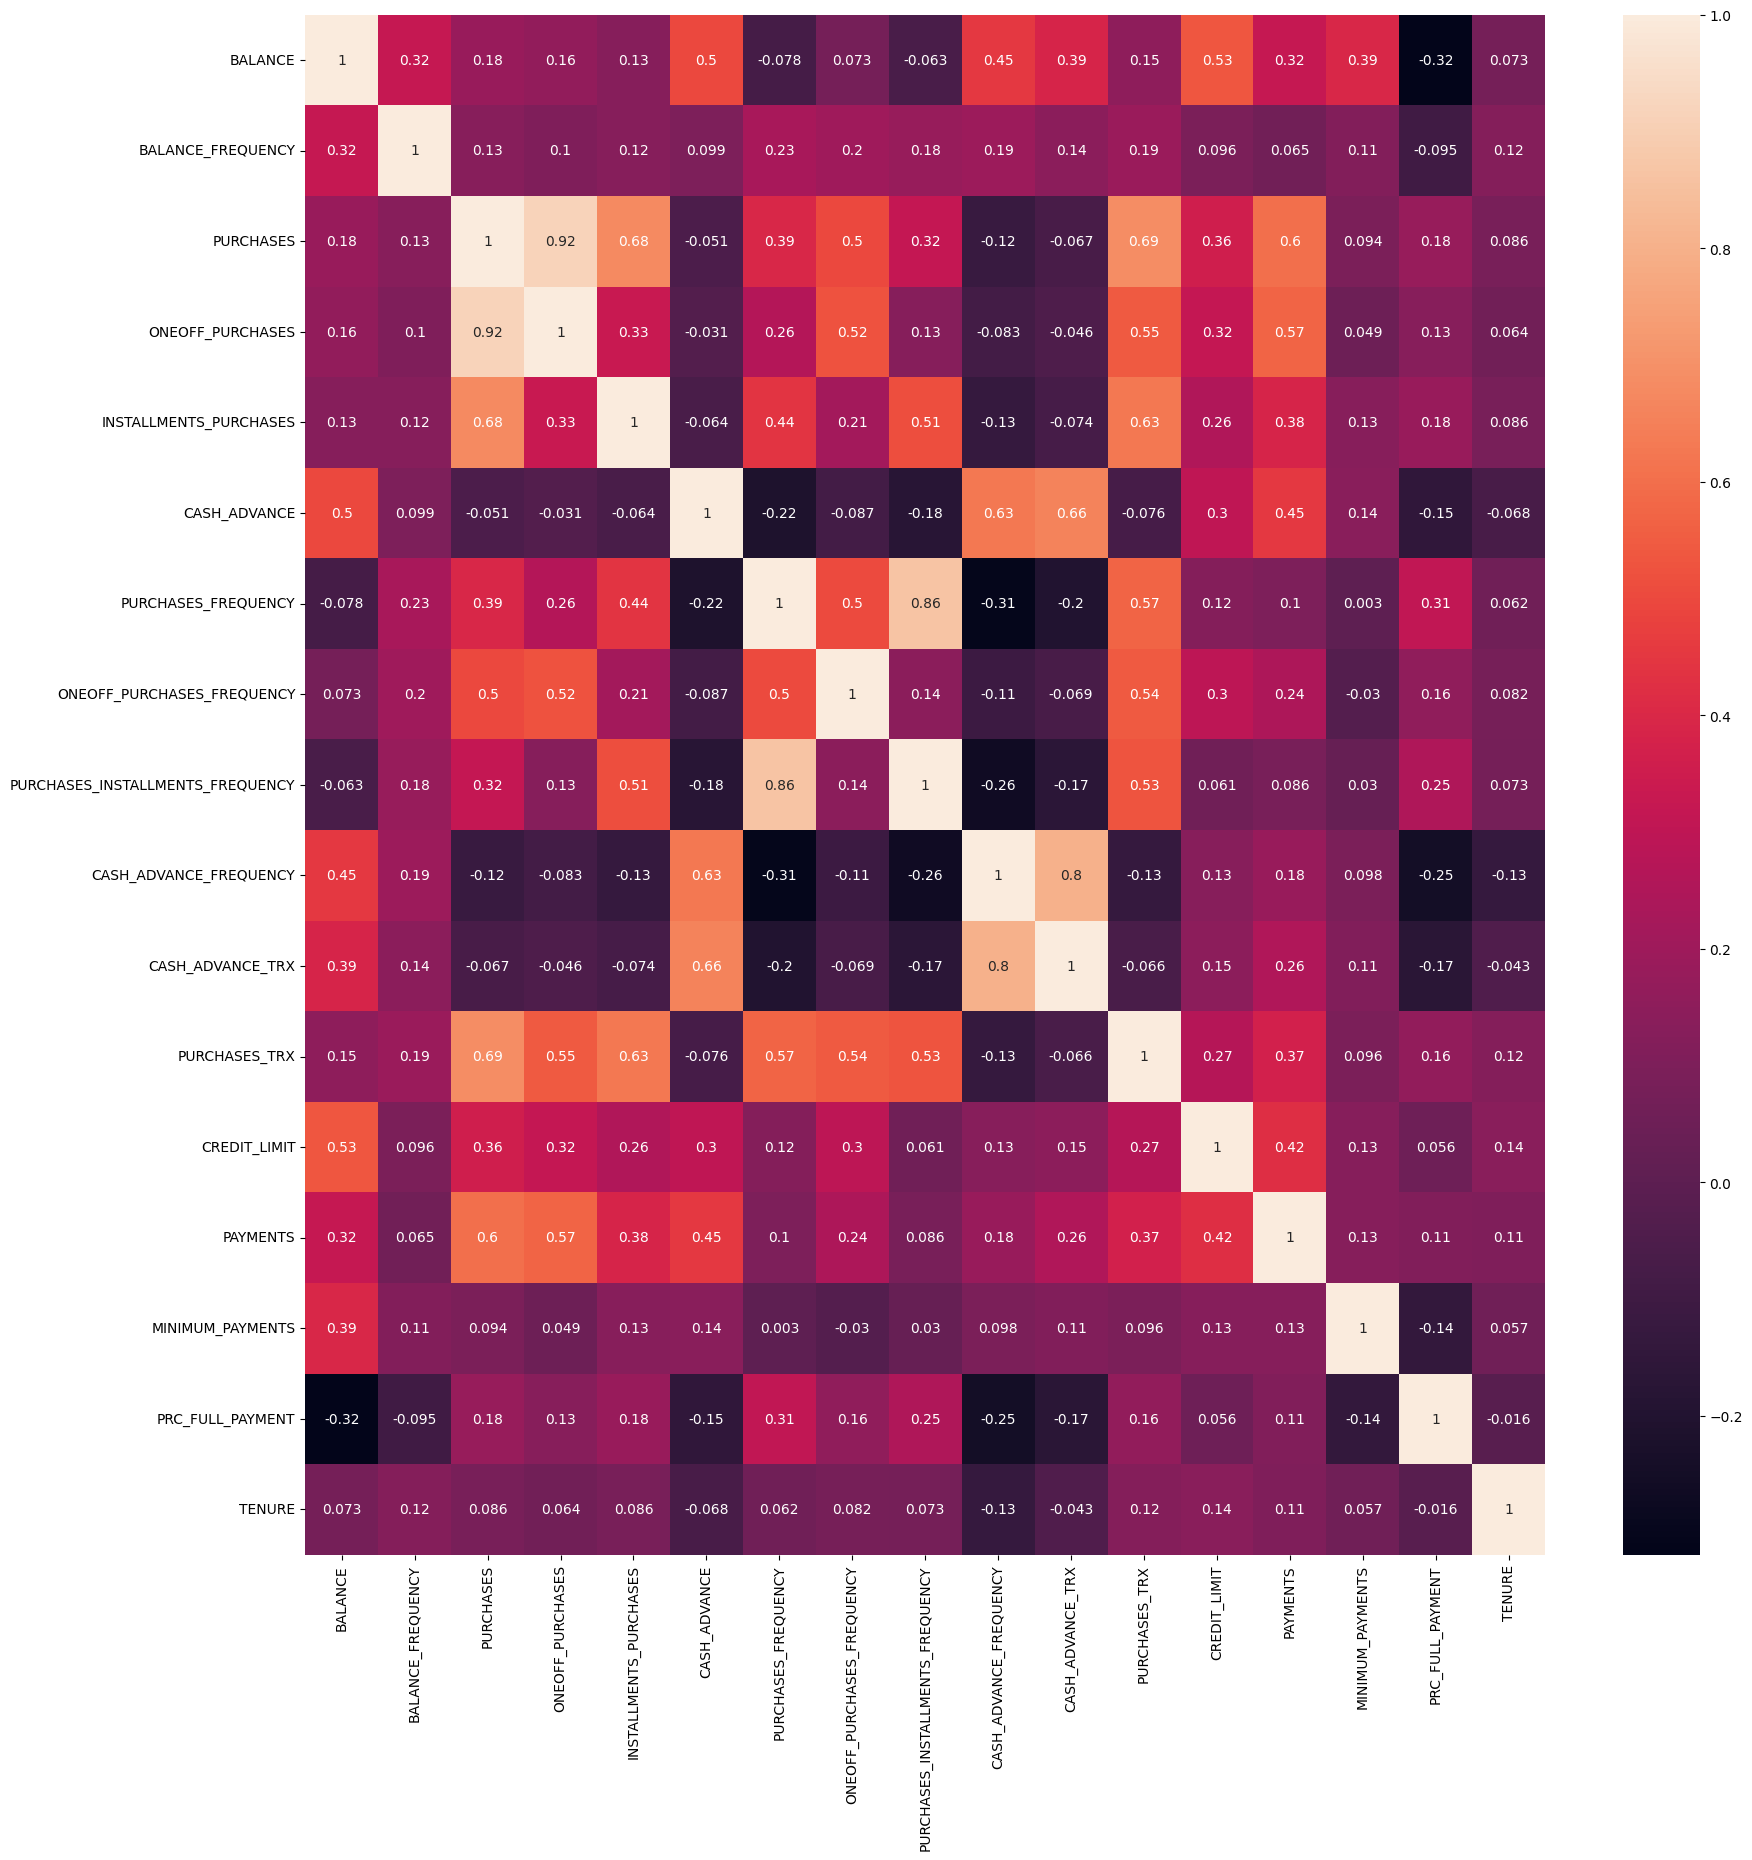

In [34]:
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)

In [35]:
#Scaling the data
scaler = StandardScaler()
credit_card_scaled = scaler.fit_transform(credit_card_df)

In [36]:
credit_card_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [37]:
#calculating wcss values for number of clusters
scores = []

range_values = range(1,20)

for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(credit_card_scaled)
  scores.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [38]:
scores

[152149.99999999983,
 127784.8744914511,
 111987.71956378862,
 99073.93826774803,
 91502.98259428913,
 84852.59400226288,
 79760.6098914097,
 74511.22165341556,
 69955.04229827935,
 66612.88069130576,
 63633.04771440393,
 61363.29959806212,
 59153.73184935287,
 57498.691360327706,
 55861.95039860559,
 54538.717465881076,
 52995.73586453461,
 51934.83947685019,
 50361.91348634267]

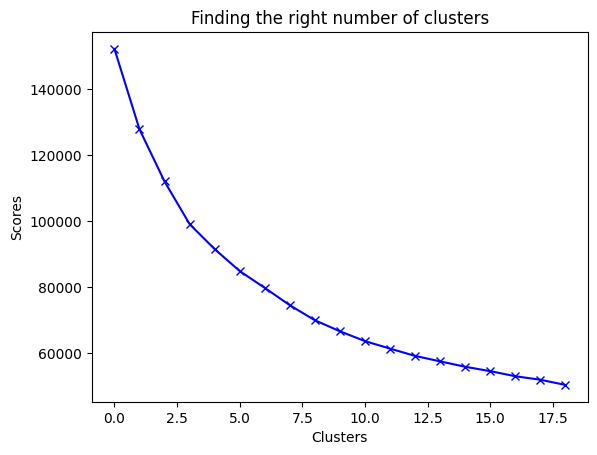

In [39]:
plt.plot(scores, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores')
plt.show()

In [41]:
#Choosing the number of clusters as 8
#applying the KNN
kmeans = KMeans(8)
kmeans.fit(credit_card_scaled)
labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [47]:
labels

array([3, 2, 0, ..., 7, 7, 7], dtype=int32)

In [48]:
kmeans.cluster_centers_

array([[-1.20216167e-01,  4.02596612e-01,  5.80282338e-01,
         7.03906302e-01,  7.86715296e-02, -3.32989471e-01,
         9.98784568e-01,  1.91463018e+00,  2.14143224e-01,
        -4.22462021e-01, -3.36573882e-01,  6.65217908e-01,
         4.69686352e-01,  1.73188405e-01, -1.56095445e-01,
         4.64246365e-01,  2.74919657e-01],
       [-3.58532411e-01,  3.33579110e-01, -2.86513970e-02,
        -2.40323582e-01,  3.73574130e-01, -3.61986114e-01,
         9.98140647e-01, -3.80370778e-01,  1.21006264e+00,
        -4.72184360e-01, -3.59308130e-01,  1.96501446e-01,
        -2.61203633e-01, -2.12548865e-01, -2.93330034e-02,
         3.11158232e-01,  2.62064547e-01],
       [ 1.65136372e+00,  3.96535553e-01, -2.24438266e-01,
        -1.60399443e-01, -2.36068484e-01,  1.96207621e+00,
        -4.87014213e-01, -2.16750666e-01, -4.25762361e-01,
         1.89651281e+00,  1.88528871e+00, -2.74065978e-01,
         1.00229107e+00,  7.75431851e-01,  5.33878484e-01,
        -3.96788117e-01,  7.5

In [49]:
kmeans.cluster_centers_.shape

(8, 17)

In [51]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [credit_card_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.120216,0.402597,0.580282,0.703906,0.078672,-0.332989,0.998785,1.914630,0.214143,-0.422462,-0.336574,0.665218,0.469686,0.173188,-0.156095,0.464246,0.274920
1,-0.358532,0.333579,-0.028651,-0.240324,0.373574,-0.361986,0.998141,-0.380371,1.210063,-0.472184,-0.359308,0.196501,-0.261204,-0.212549,-0.029333,0.311158,0.262065
2,1.651364,0.396536,-0.224438,-0.160399,-0.236068,1.962076,-0.487014,-0.216751,-0.425762,1.896513,1.885289,-0.274066,1.002291,0.775432,0.533878,-0.396788,0.075115
3,0.000115,0.403110,-0.354008,-0.238214,-0.399295,-0.109743,-0.840671,-0.381748,-0.751713,0.081439,-0.043605,-0.477483,-0.313540,-0.254432,-0.013711,-0.454023,0.273424
4,-0.700816,-2.140235,-0.309694,-0.234522,-0.301296,-0.320252,-0.553044,-0.441483,-0.437995,-0.521144,-0.376401,-0.417868,-0.174007,-0.191966,-0.256475,0.289552,0.200511
5,1.106396,0.475193,2.599603,1.864869,2.720757,-0.122048,1.169176,1.578346,1.290972,-0.261631,-0.121752,3.255713,1.349204,1.530007,0.617128,0.247010,0.335232
6,1.865907,0.332878,12.596844,13.111182,5.696389,-0.004178,1.033322,2.170634,0.866221,-0.476183,-0.214854,4.566558,3.174197,8.991136,1.064817,1.236317,0.295702
7,-0.340497,-0.342085,-0.285966,-0.212903,-0.284664,0.063943,-0.190065,-0.283489,-0.214814,0.301742,-0.002968,-0.384573,-0.562207,-0.390529,-0.210504,0.016567,-3.186937


In [53]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [credit_card_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,2.737075e+06,1.107681,4.793179e+06,2.923123e+06,4.364670e+05,5.893612e+05,0.848037,0.433246,0.543097,0.145271,9.745236,791.335284,2.257486e+07,6.470413e+06,1.167101e+06,0.238388,27.422801
1,1.704620e+06,1.103808,2.013581e+06,3.218449e+05,6.776195e+05,4.618454e+05,0.847933,0.229004,0.700400,0.143280,8.686489,501.746468,1.289932e+07,3.237758e+06,1.855553e+06,0.225292,27.399778
2,1.041207e+07,1.107341,1.119873e+06,5.420295e+05,1.790927e+05,1.068215e+07,0.608703,0.243565,0.442026,0.238132,113.218708,211.014065,2.962549e+07,1.151749e+07,4.914373e+06,0.164730,27.064964
3,3.258385e+06,1.107709,5.284260e+05,3.276565e+05,4.561674e+04,1.571109e+06,0.551736,0.228881,0.390543,0.165449,23.388974,85.336333,1.220649e+07,2.886761e+06,1.940396e+06,0.159834,27.420123
4,2.217464e+05,0.964984,7.307044e+05,3.378275e+05,1.257541e+05,6.453748e+05,0.598067,0.223565,0.440094,0.141319,7.890479,122.168585,1.405363e+07,3.410251e+06,6.219357e+05,0.223444,27.289541
5,8.051117e+06,1.111755,1.401077e+07,6.121483e+06,2.596996e+06,1.516999e+06,0.875483,0.403319,0.713179,0.151711,19.749605,2391.830213,3.421793e+07,1.784117e+07,5.366504e+06,0.219804,27.530815
6,1.134154e+07,1.103768,5.964515e+07,3.710418e+07,5.030277e+06,2.035346e+06,0.853600,0.456029,0.646091,0.143120,15.413822,3201.714695,5.837723e+07,8.036885e+07,7.797919e+06,0.304436,27.460020
7,1.782756e+06,1.065891,8.390181e+05,3.973853e+05,1.393542e+05,2.334912e+06,0.656536,0.237626,0.475345,0.174271,25.281455,142.739301,8.914638e+06,1.746201e+06,8.716041e+05,0.200091,21.222861


In [54]:
labels.min()

0

In [55]:
labels.max()

7

In [57]:
y_kmeans = kmeans.fit_predict(credit_card_scaled)
y_kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 1, 0, ..., 3, 2, 4], dtype=int32)

In [59]:
# concatenate the clusters labels to our original dataframe
credit_card_df_cluster = pd.concat([credit_card_df, pd.DataFrame({'cluster':labels})], axis = 1)
credit_card_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,3
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3


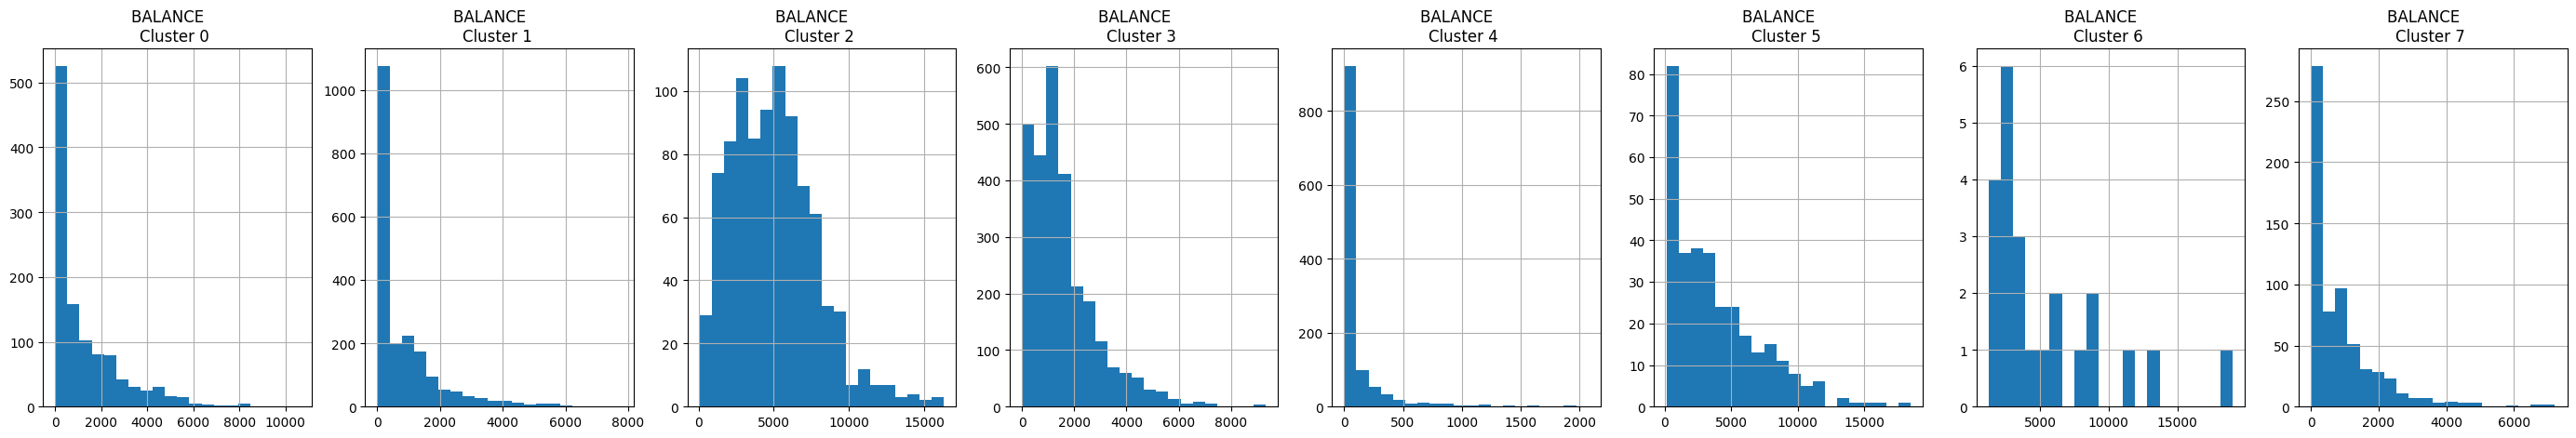

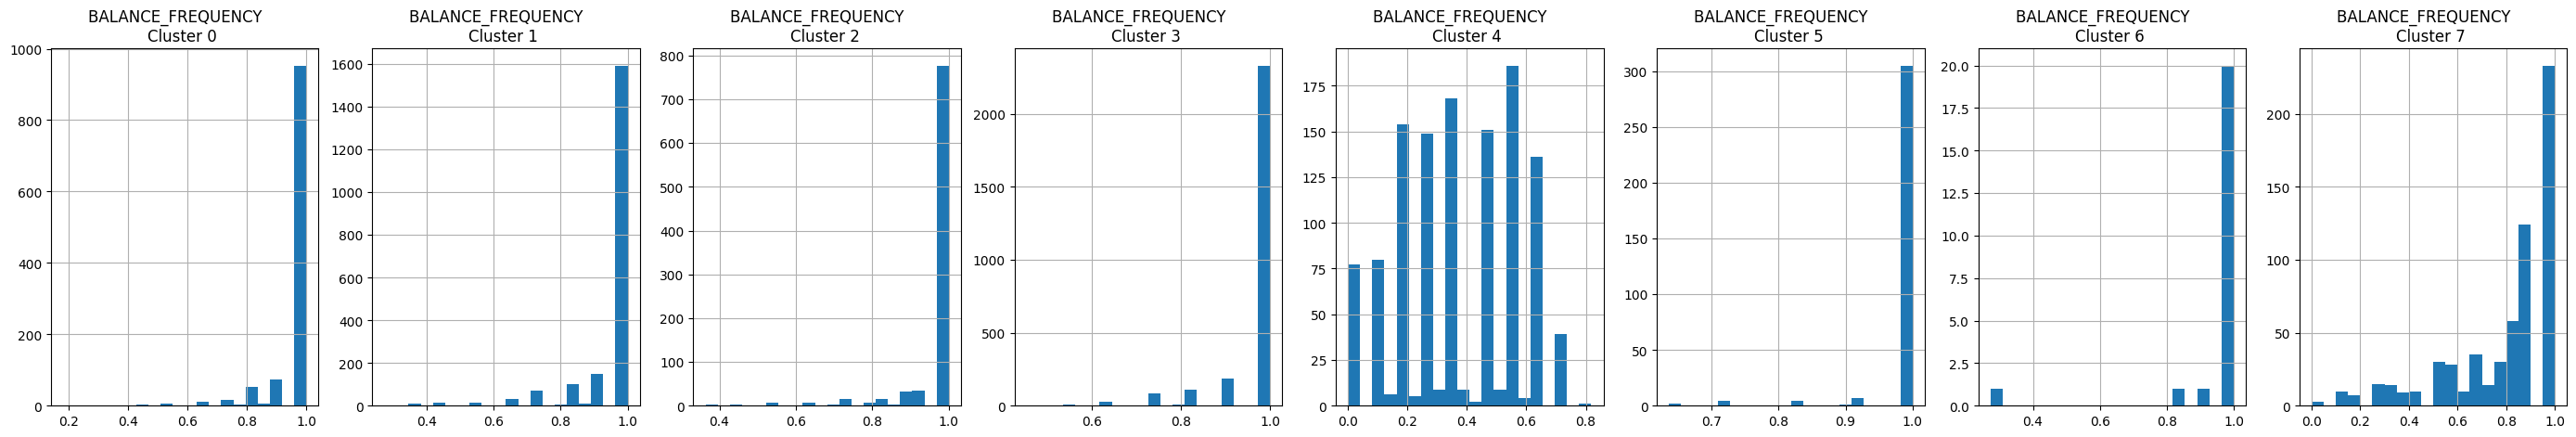

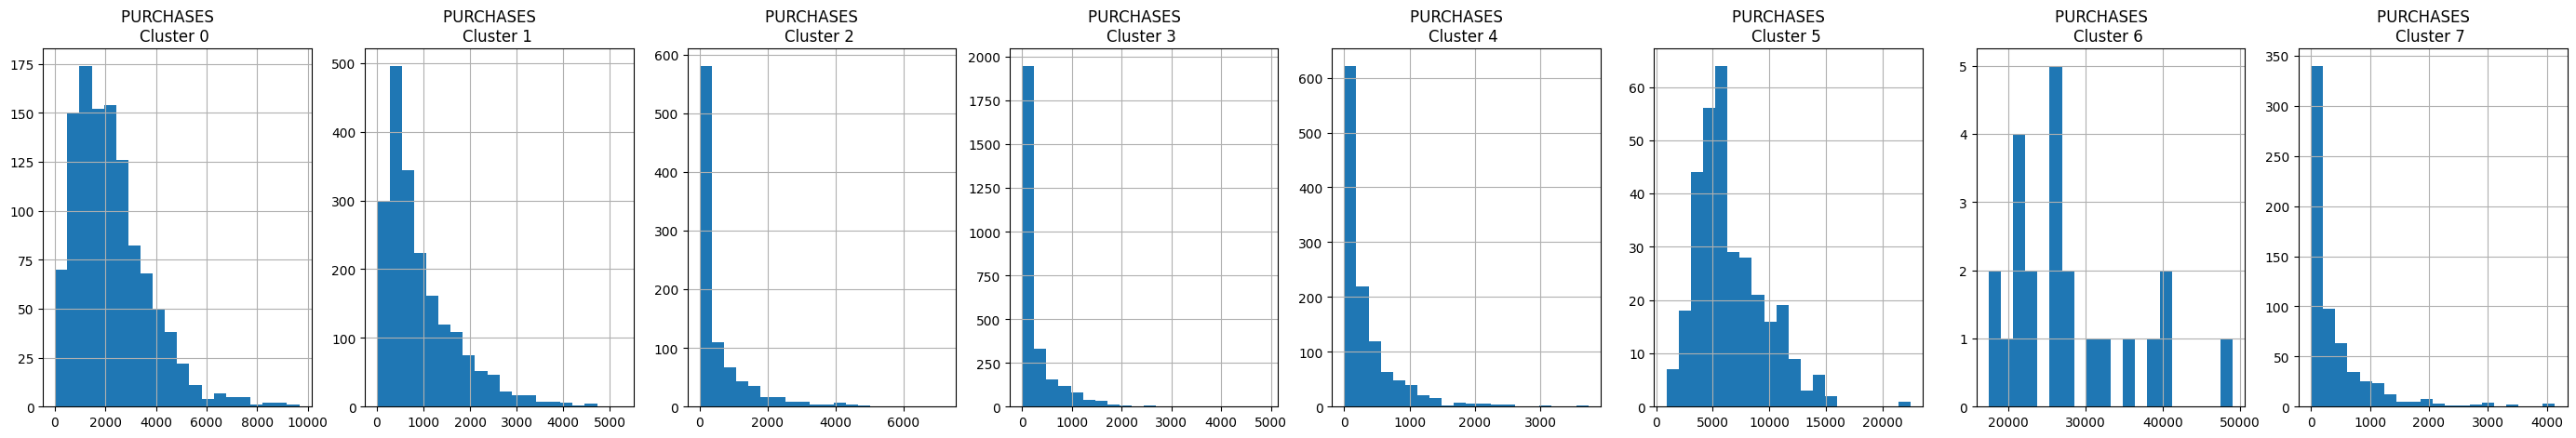

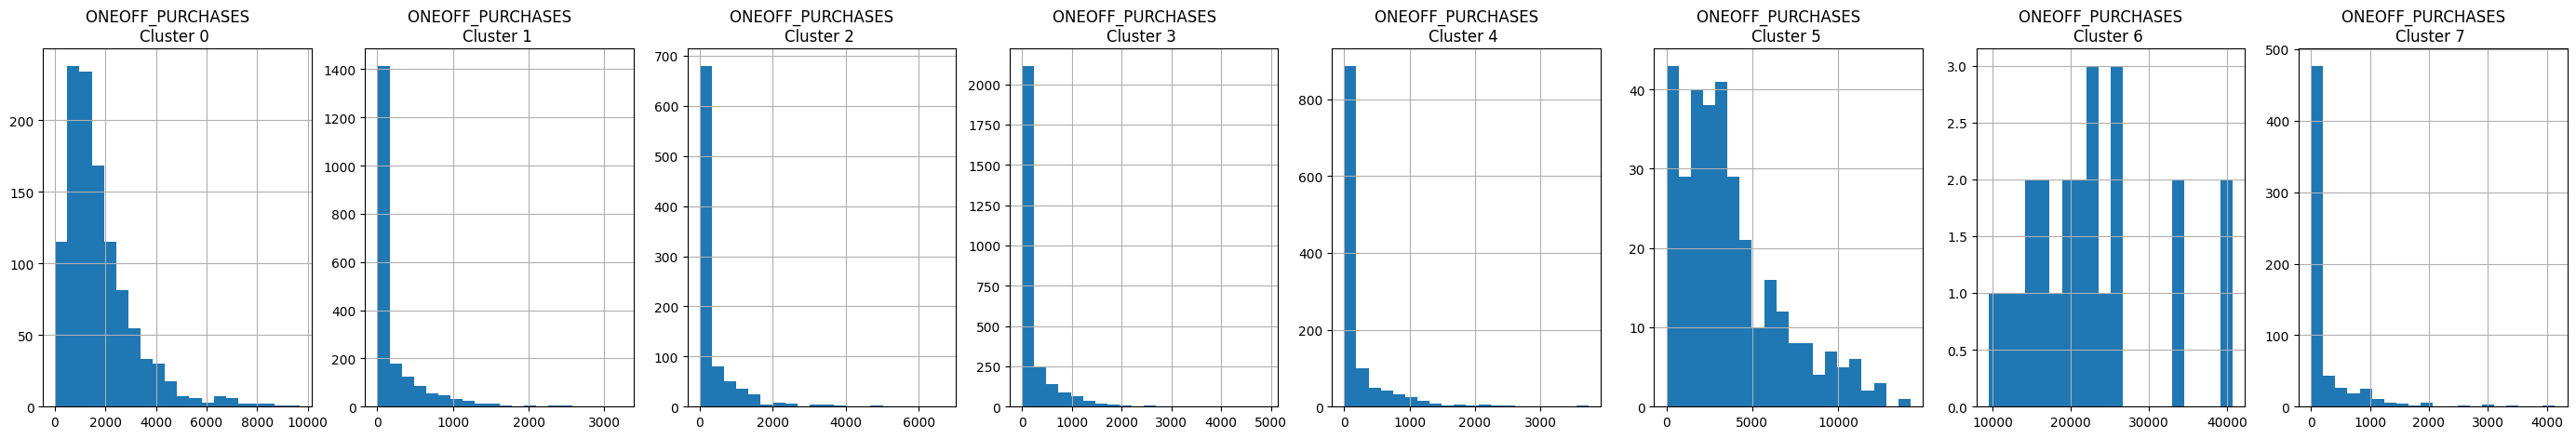

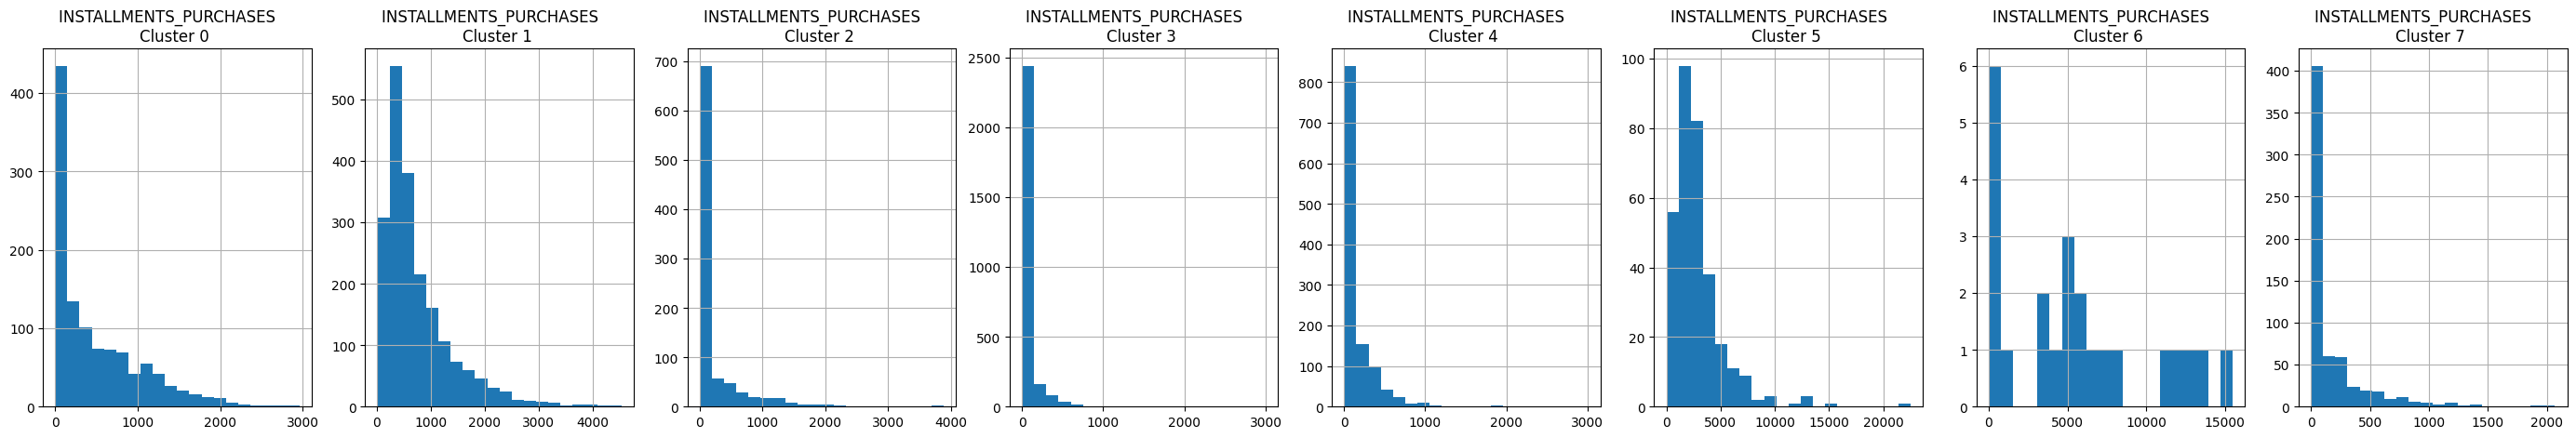

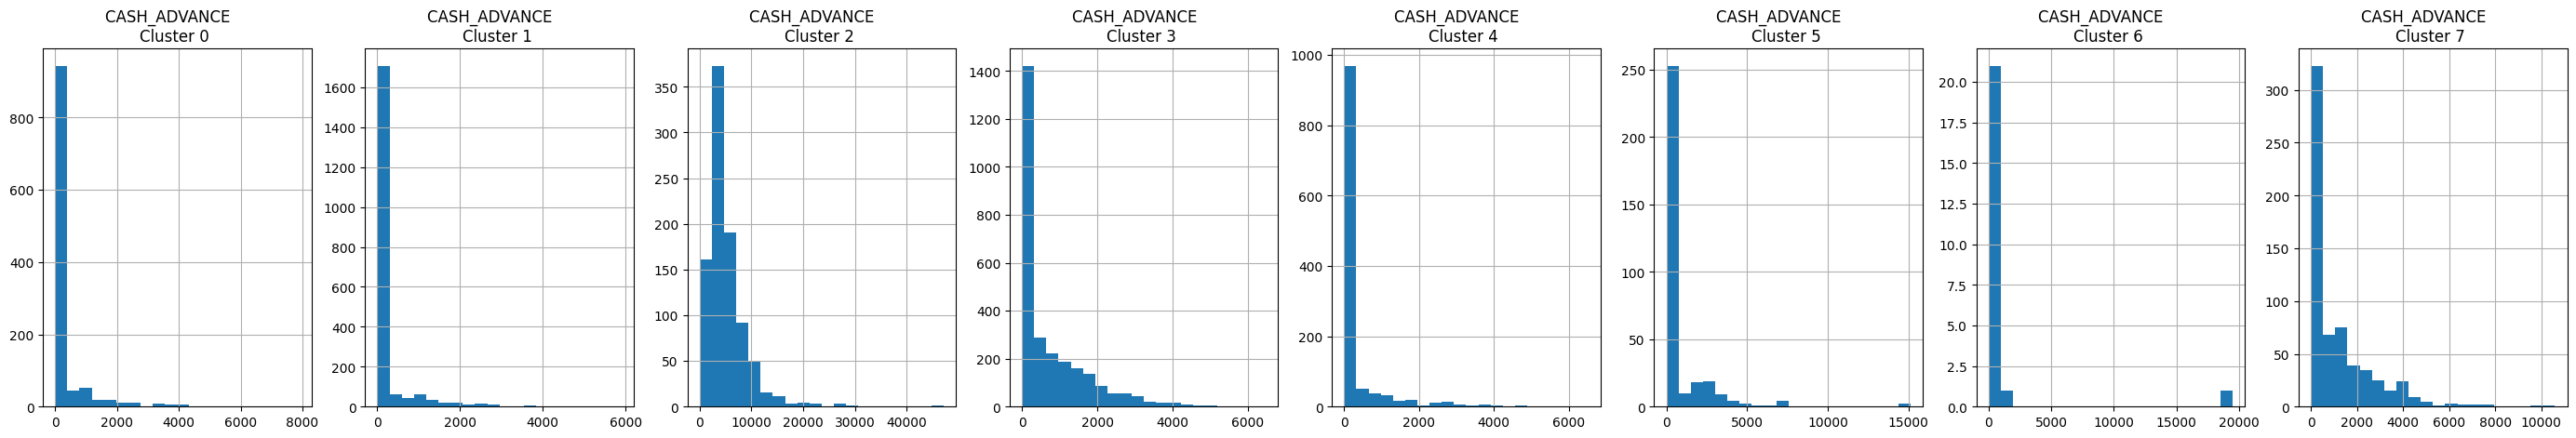

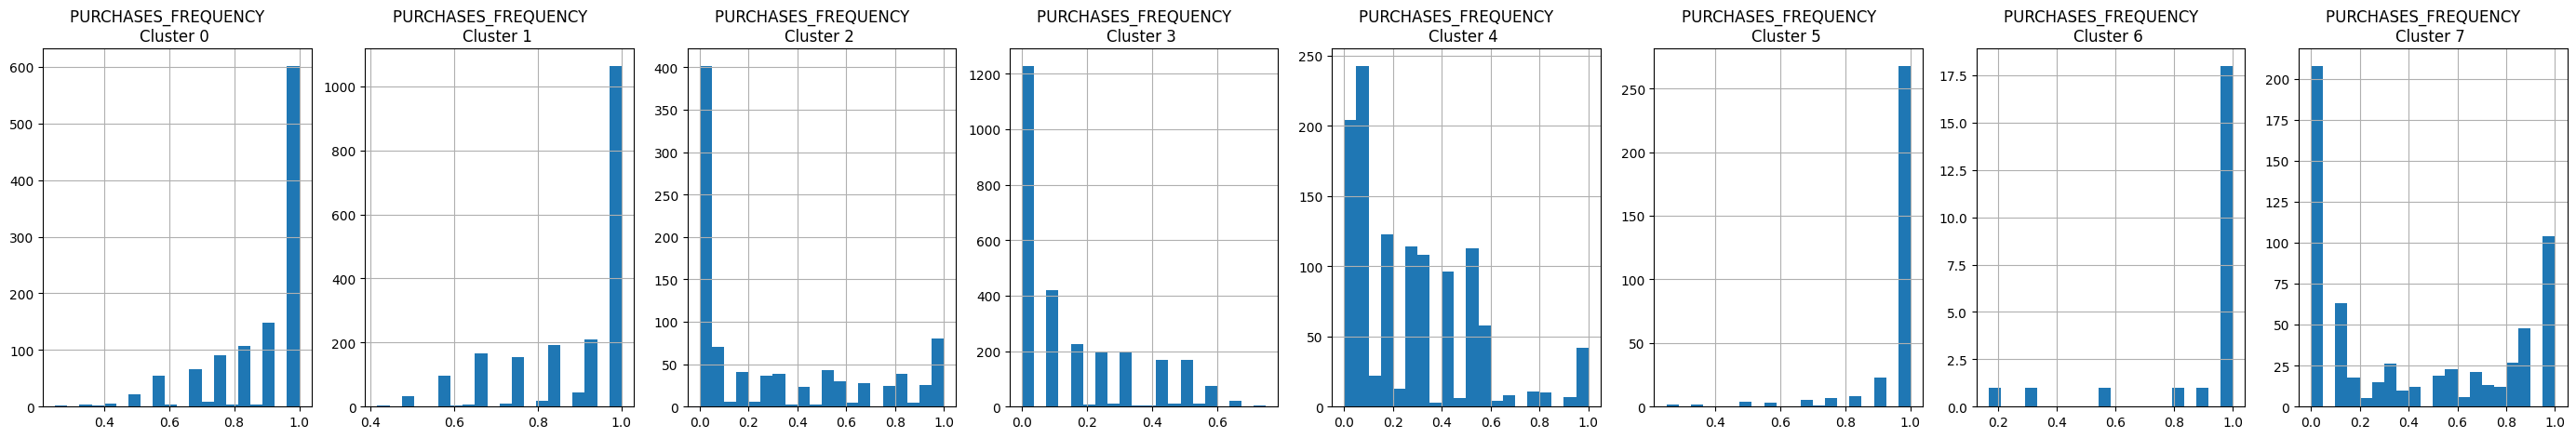

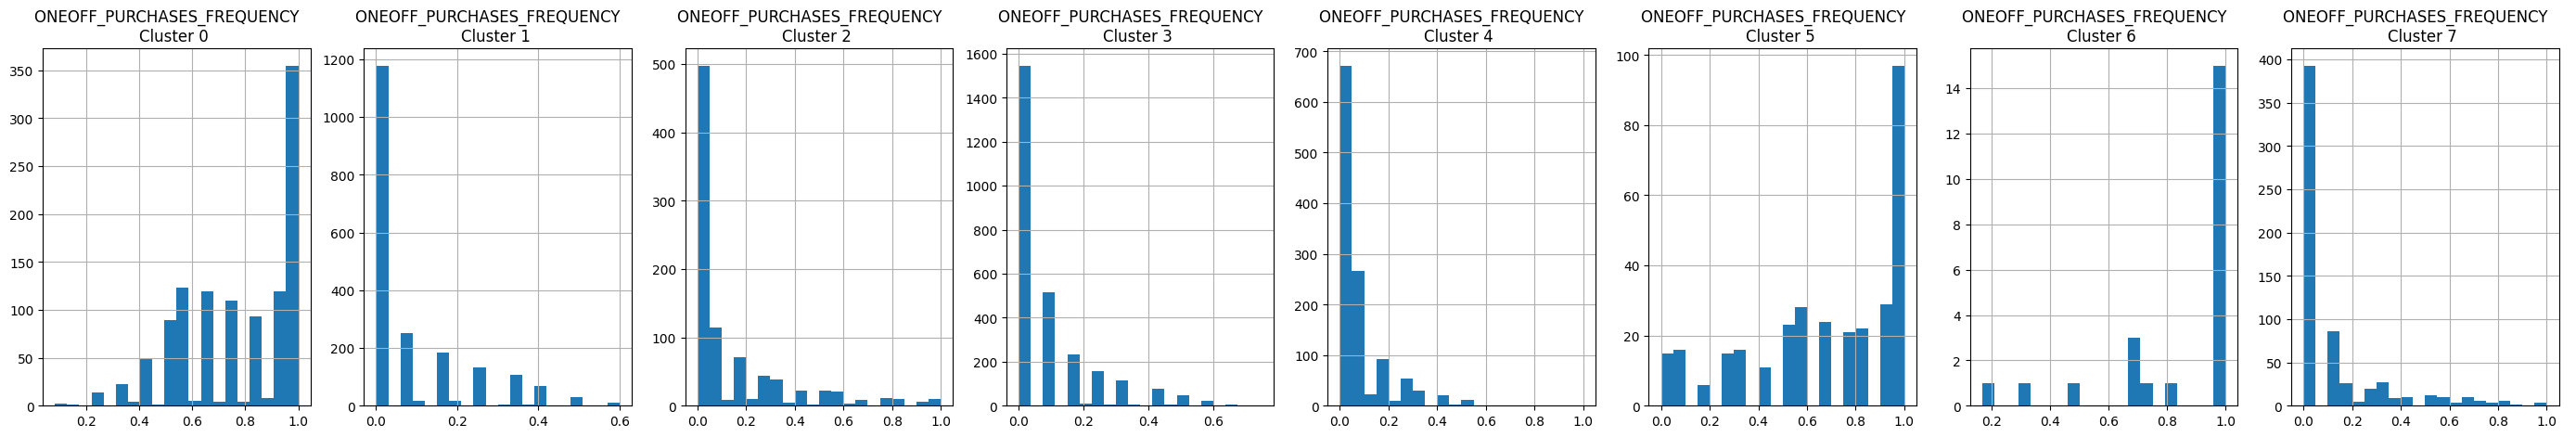

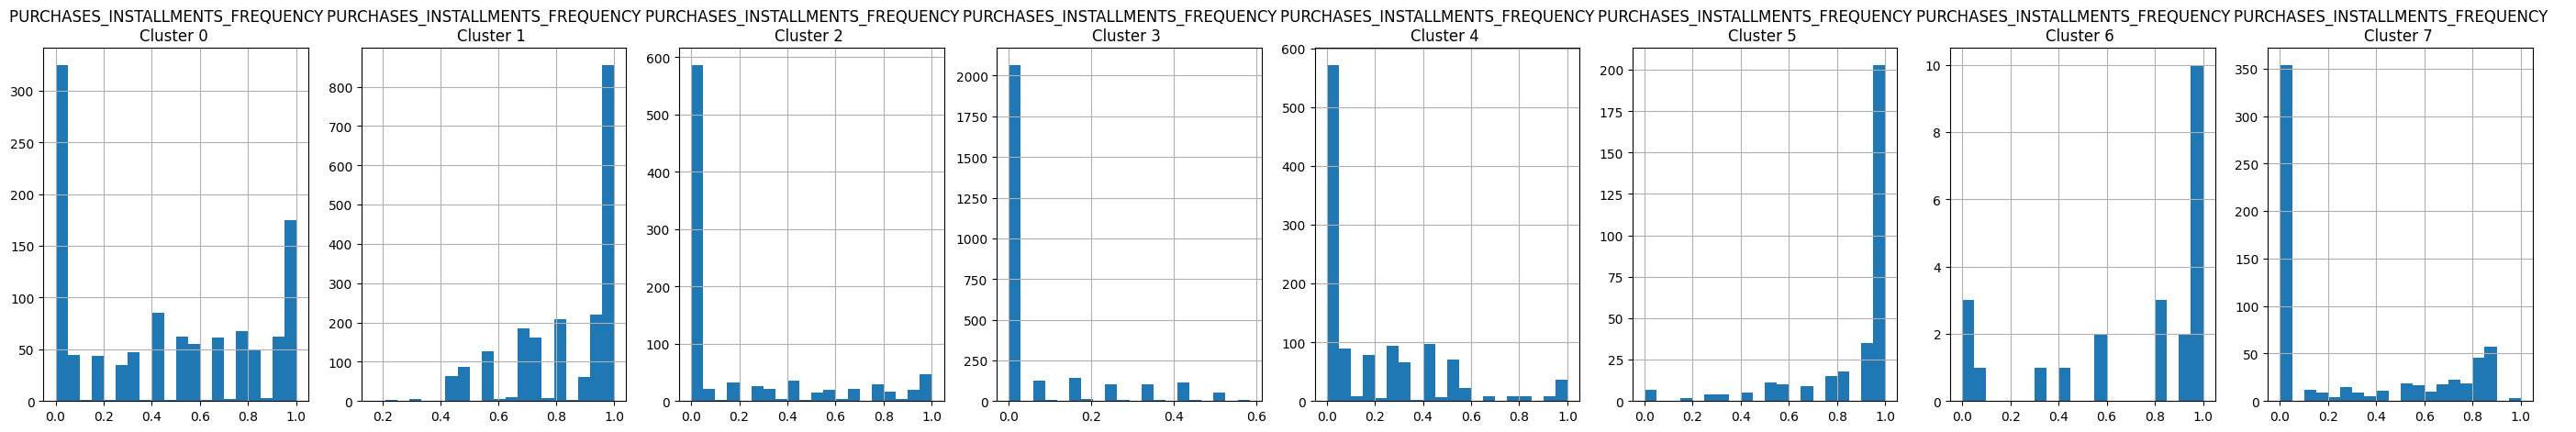

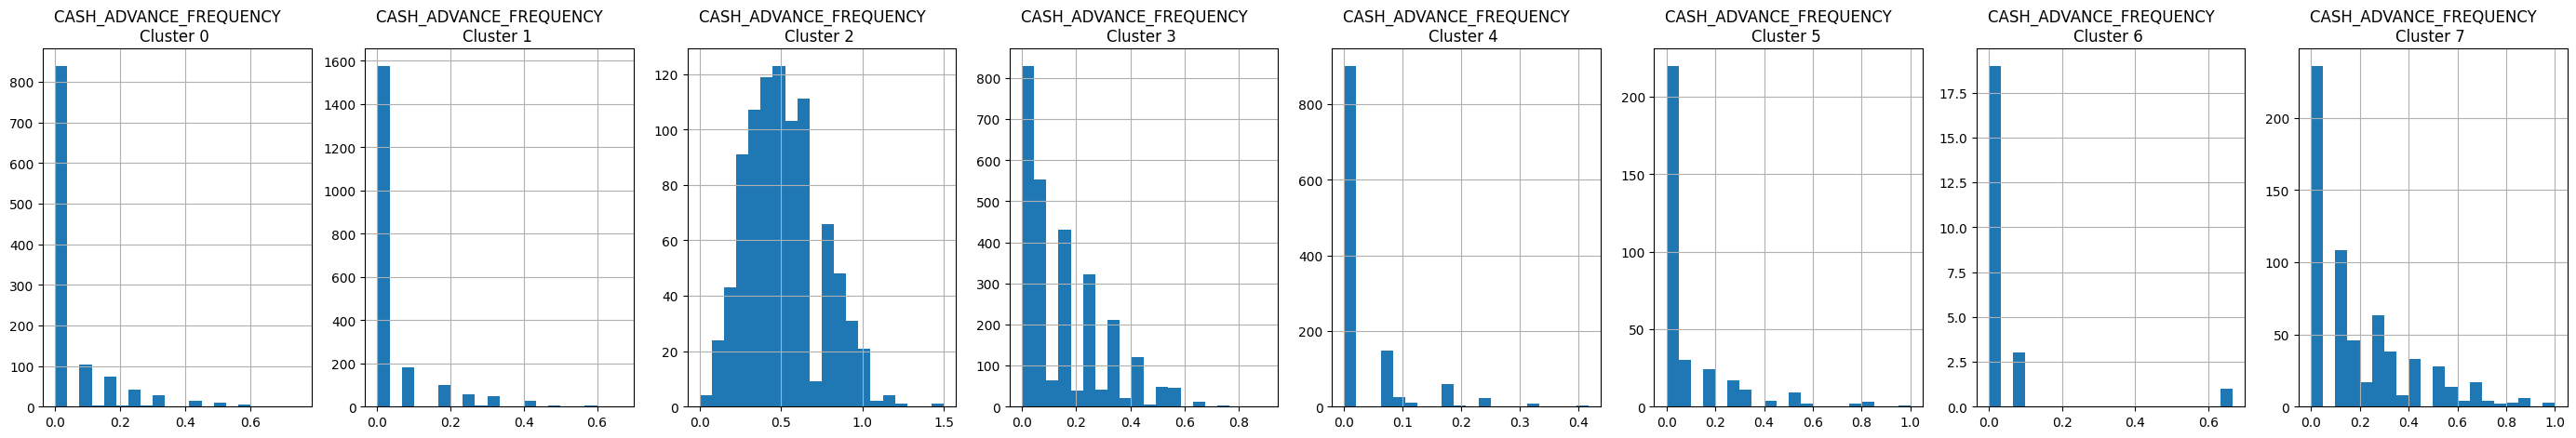

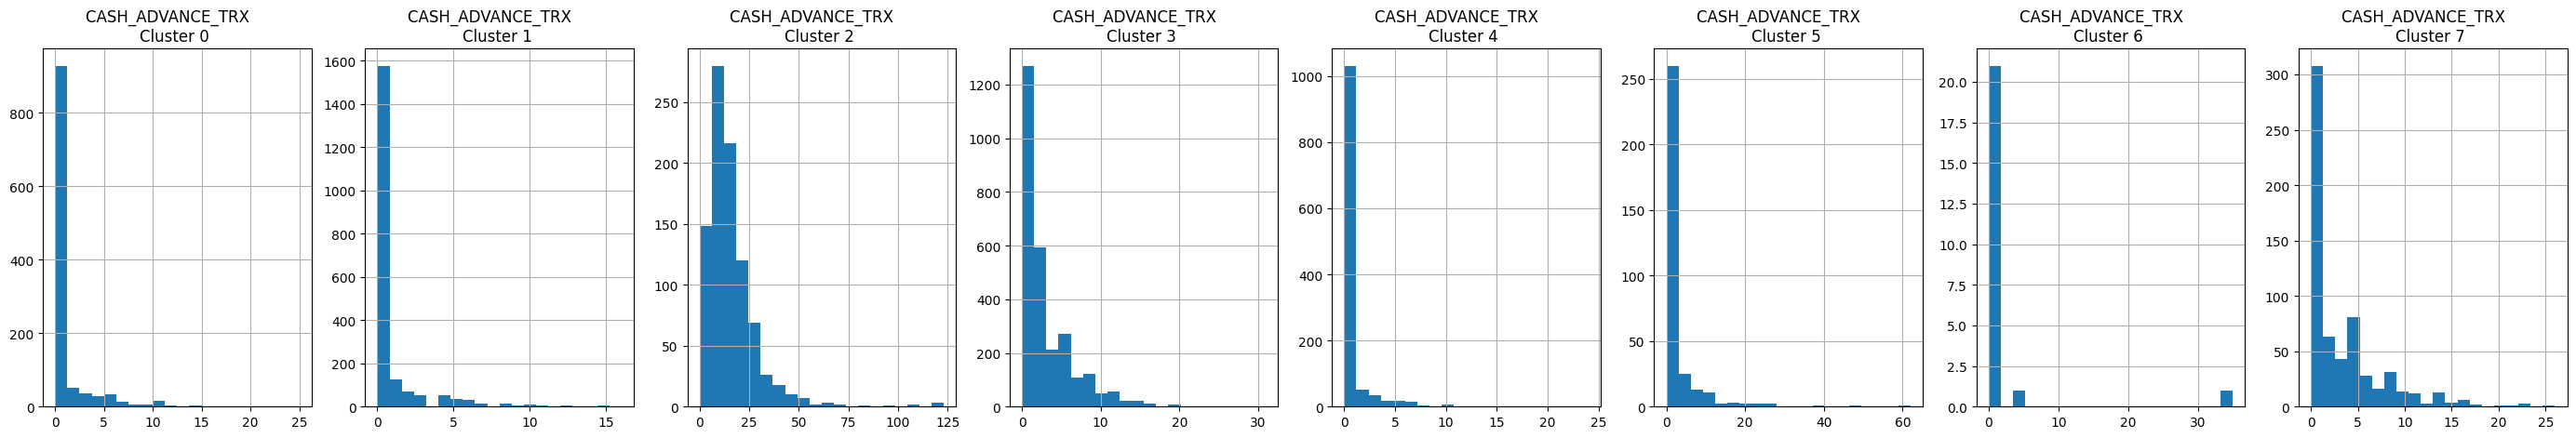

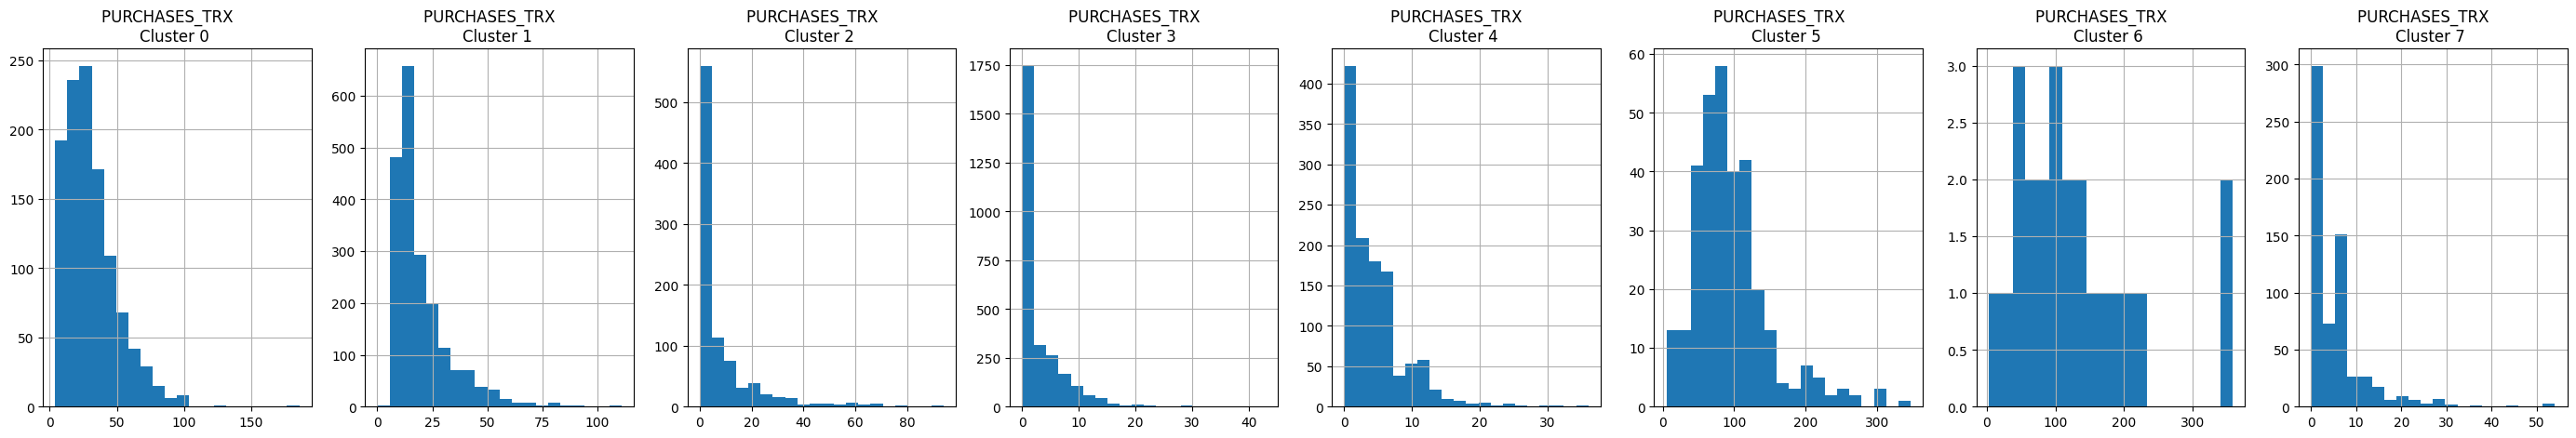

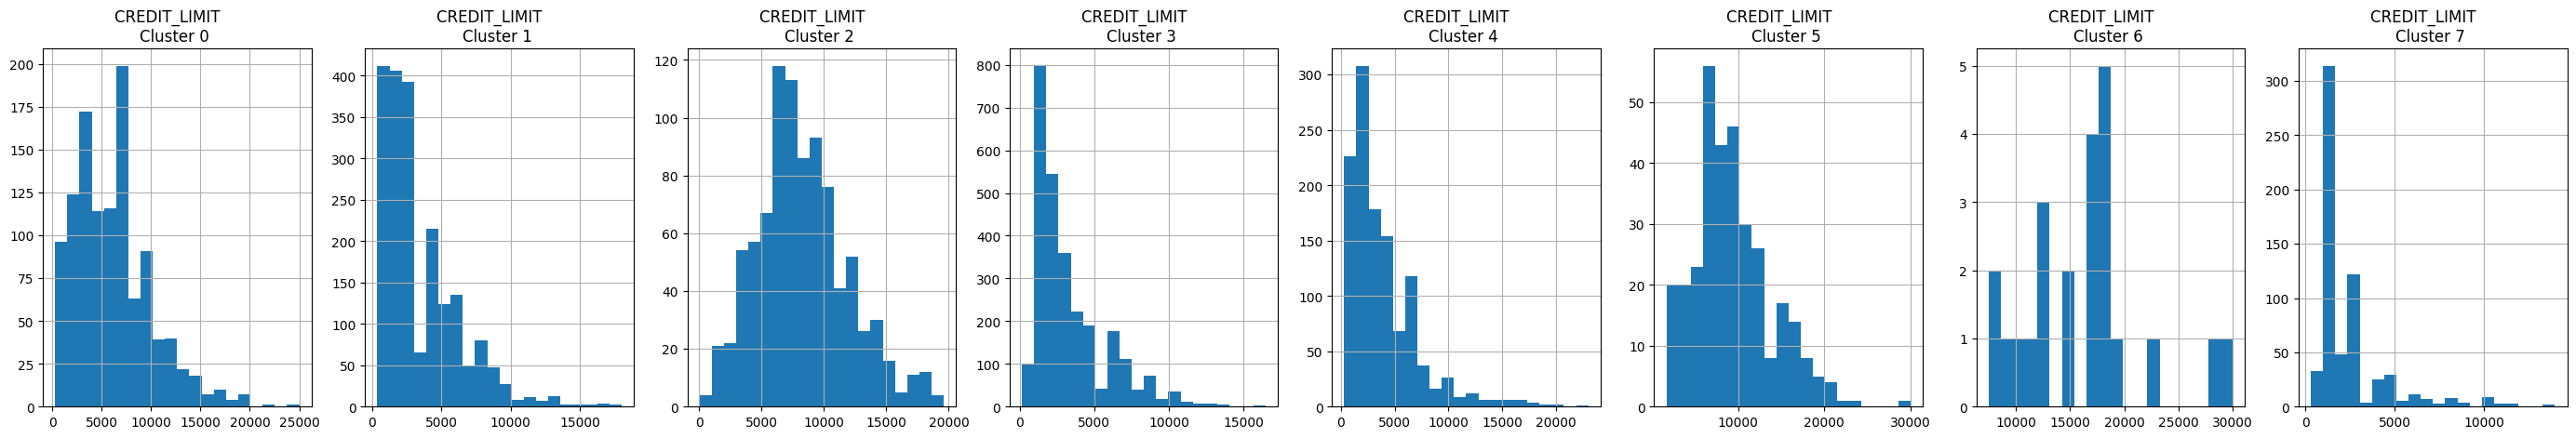

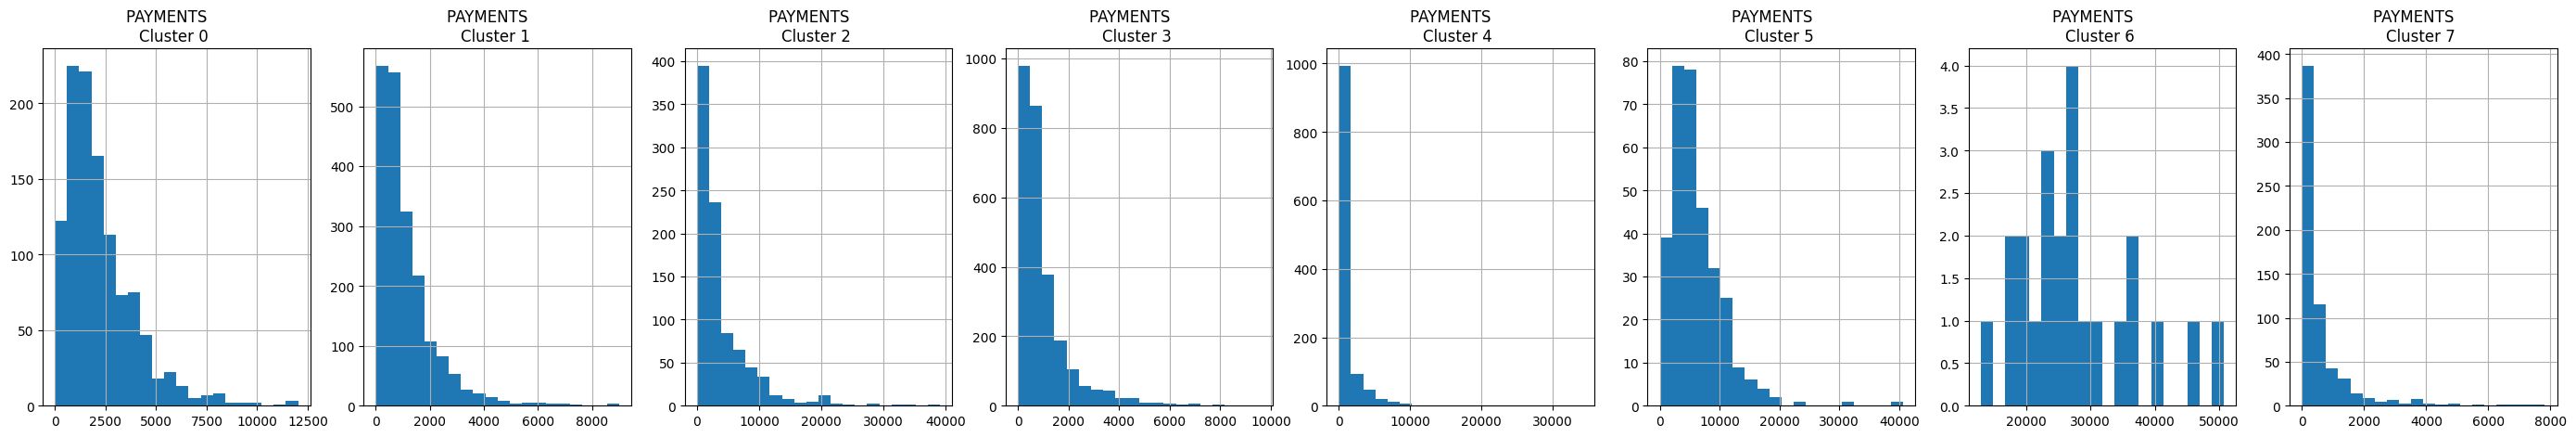

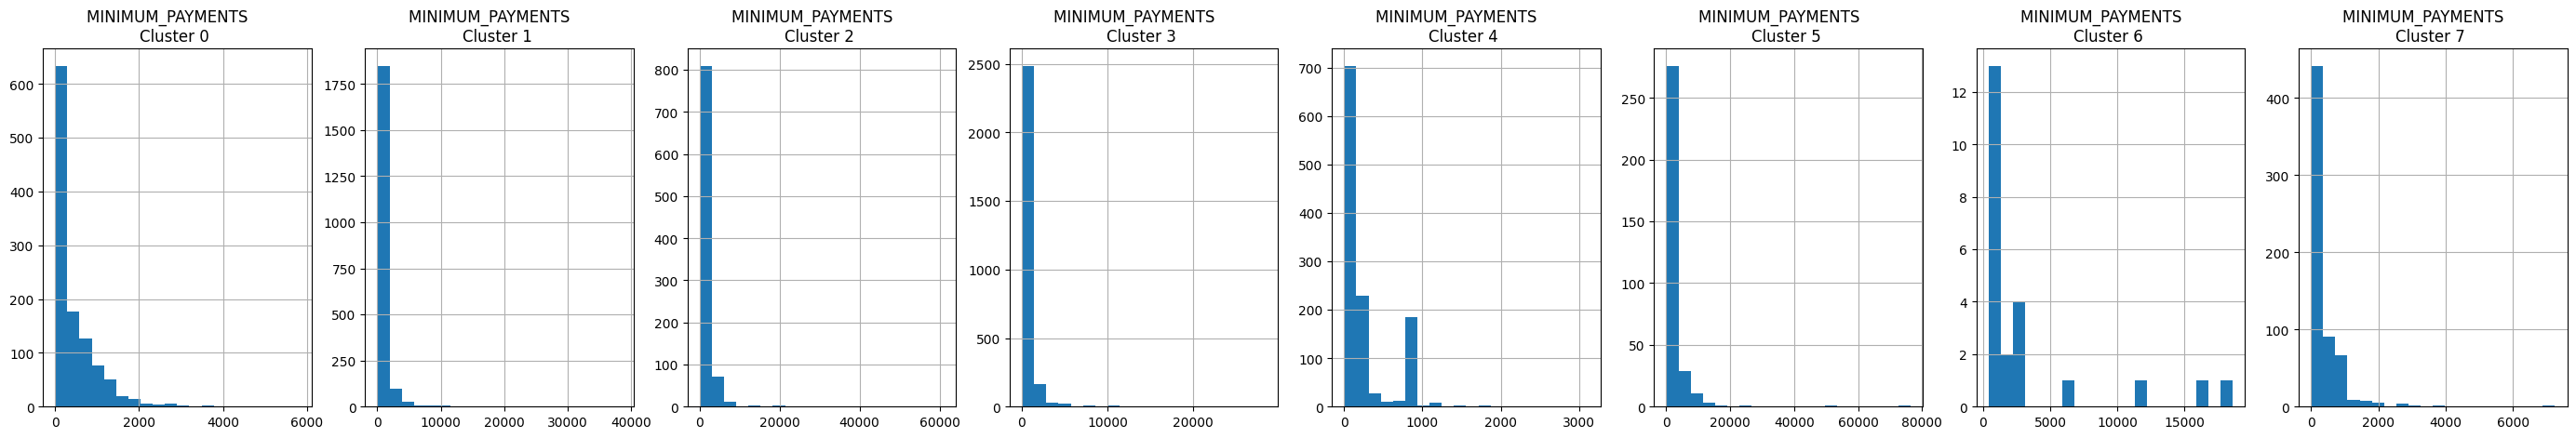

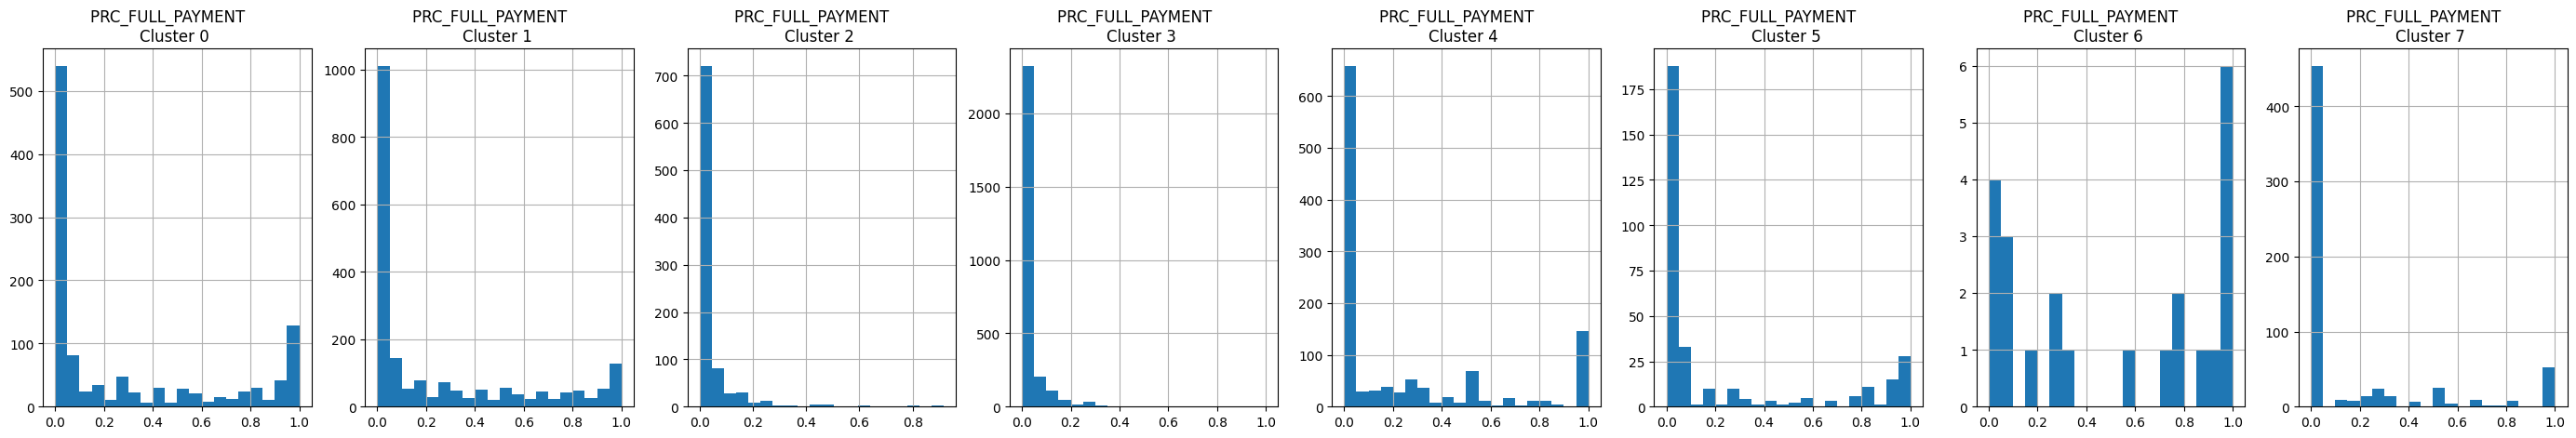

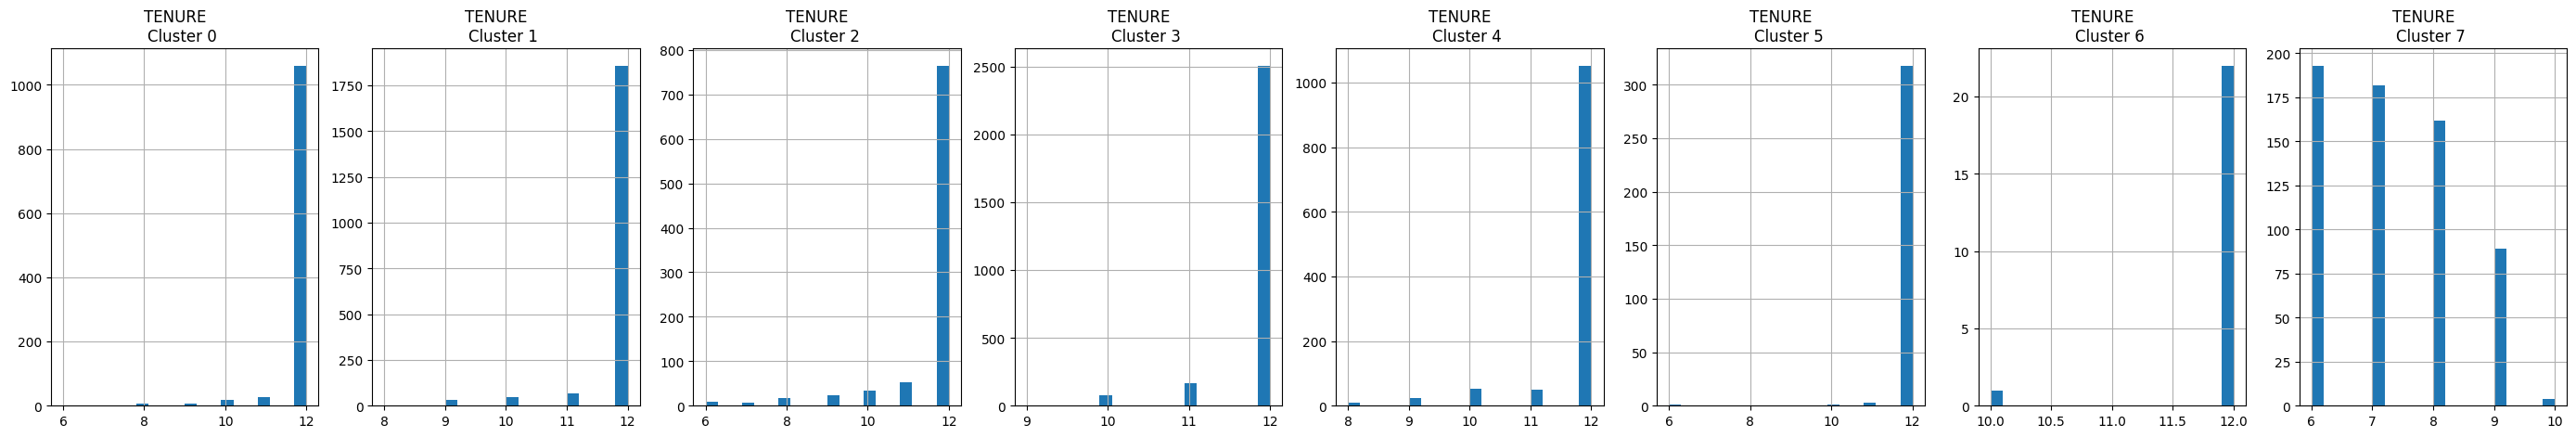

In [61]:
# Plot the histogram of various clusters
for i in credit_card_df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(8):
    plt.subplot(1,8,j+1)
    cluster = credit_card_df_cluster[credit_card_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))

  plt.show()

In [62]:
#Applying PCA

pca = PCA(n_components = 2)
principal_components = pca.fit_transform(credit_card_scaled)
principal_components

array([[-1.68222102, -1.07644408],
       [-1.13829946,  2.50648954],
       [ 0.96968643, -0.38354195],
       ...,
       [-0.92620264, -1.81078103],
       [-2.33655099, -0.65795626],
       [-0.55642051, -0.40048049]])

In [64]:
#create dataframe with 2 columns
pca_df = pd.DataFrame(data = principal_components, columns = ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.682221,-1.076444
1,-1.138299,2.506490
2,0.969686,-0.383542
3,-0.873630,0.043173
4,-1.599434,-0.688575


In [72]:
pca_df.shape,credit_card_scaled.shape

((8950, 2), (8950, 17))

In [77]:
#concatenate labels with pca_df
pca_df = pd.concat([pca_df, pd.DataFrame({'Cluster': labels})], axis = 1)
pca_df

,pca1,pca2,Cluster
0,-1.682221,-1.076444,3
1,-1.138299,2.506490,2
2,0.969686,-0.383542,0
3,-0.873630,0.043173,3
4,-1.599434,-0.688575,3
...,...,...,...
8945,-0.359628,-2.016142,7
8946,-0.564368,-1.639116,7
8947,-0.926203,-1.810781,7
8948,-2.336551,-0.657956,7


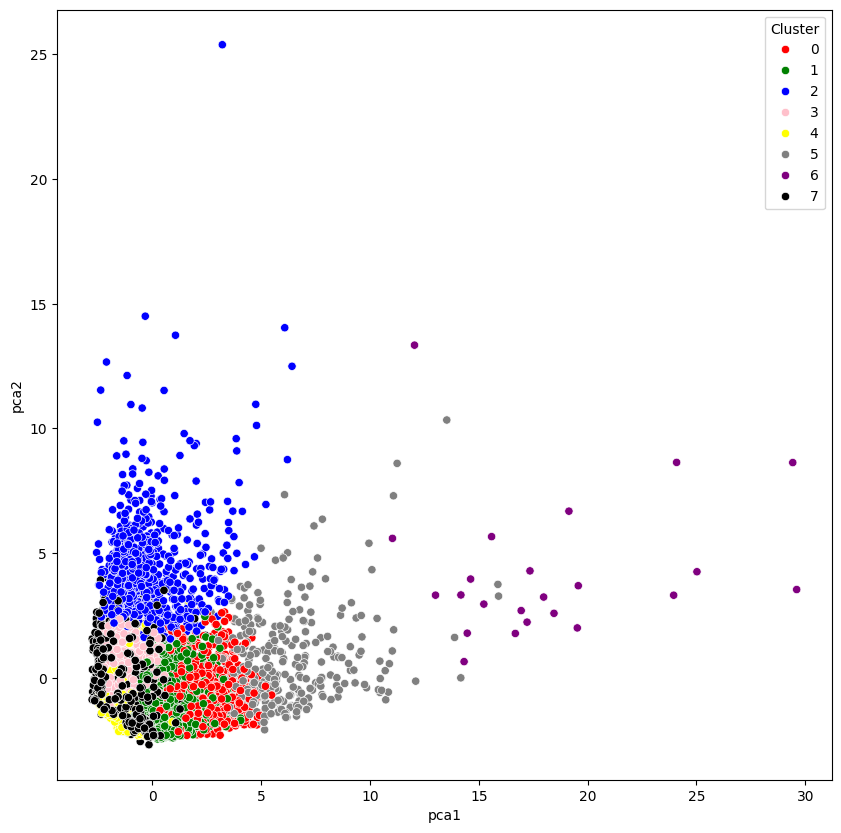

In [81]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "Cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple', 'black'])
plt.show()